In [1]:
%matplotlib inline
import sys
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np

In [2]:
test_case_name='frey1'
encoder = keras.models.load_model('%s_encoder_pretrained.h5' % test_case_name)
decoder = keras.models.load_model('%s_decoder_pretrained.h5' % test_case_name)

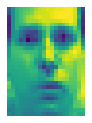

In [3]:
from ipywidgets import FloatSlider, interact
humour = FloatSlider(min=-15, max=15, step=3, value=0)
pose = FloatSlider(min=-15, max=15, step=3, value=0)
@interact(pose=pose, humour=humour)
def do_thumb(humour, pose):
    z = np.array([[pose, humour]]) * 0.05
    mu_x, log_sigma_x = decoder(z)
    face = np.reshape(mu_x.numpy(), (28,20))
    plt.figure(figsize=(2, 2))
    ax = plt.subplot(111)
    ax.imshow(face)
    plt.axis("off")